**특성 속성**
1. **datetime** : 시간별 날짜 및 타임스탬프
2. **season** : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
3. **holiday** : 공휴일 여부
4. **workingday** : 주말이나 공휴일이 아닌 평일 여부
5. **weather**
* 1: 맑음, 약간의 구름, 부분적으로 흐림, 부분적으로 흐림
* 2: 안개 + 흐림, 안개 + 구름 조금, 안개 + 약간의 구름, 안개
* 3: 가벼운 눈, 가벼운 비 + 천둥 + 흩어진 구름, 가벼운 비 + 흩어진 구름
* 4: 폭우 + 우박 + 천둥 + 안개, 눈 + 안개
6. **temp** : 섭씨 온도
7. **atemp** : 체감 온도 (섭씨)
8. **humidity** : 상대 습도
9. **windspeed** : 풍속
10. **casual** : 비등록 사용자 대여 건수
11. **registered** : 등록 사용자 대여 건수
12. **count** : 총 대여 건수


### **1. 데이터 가져오기**
* 터미널에서 `~/data/data/bike-sharing-demand` 경로에 `train.csv` 데이터를 `train` 변수로 가져 옵니다.

In [50]:
# 관련 라이브러리 불러오기
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [51]:
# train 데이터셋 가져오기
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### **2. `datetime` 컬럼을 `datetime` 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기**
* 'pandas', 'datetime', 'extract', 'year', 'month', 'day' 키워드로 검색해 보기

In [52]:
# datetime 컬럼을 datetime 자료형으로 변환하기
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

### **3.`year`, `month`, `day`, `hour`, `minute`, `second` 데이터 개수 시각화하기**
* `sns.countplot` 활용해서 시각화하기
* `subplot`을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<ipython-input-77-98612840dfee>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=train, ax=axes[0, 0], palette='pastel')
<ipython-input-77-98612840dfee>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=train, ax=axes[0, 1], palette='pastel')
<ipython-input-77-98612840dfee>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=train, ax=axes[1, 0], palette='pastel')
<ipython-input-77-98612840dfee>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

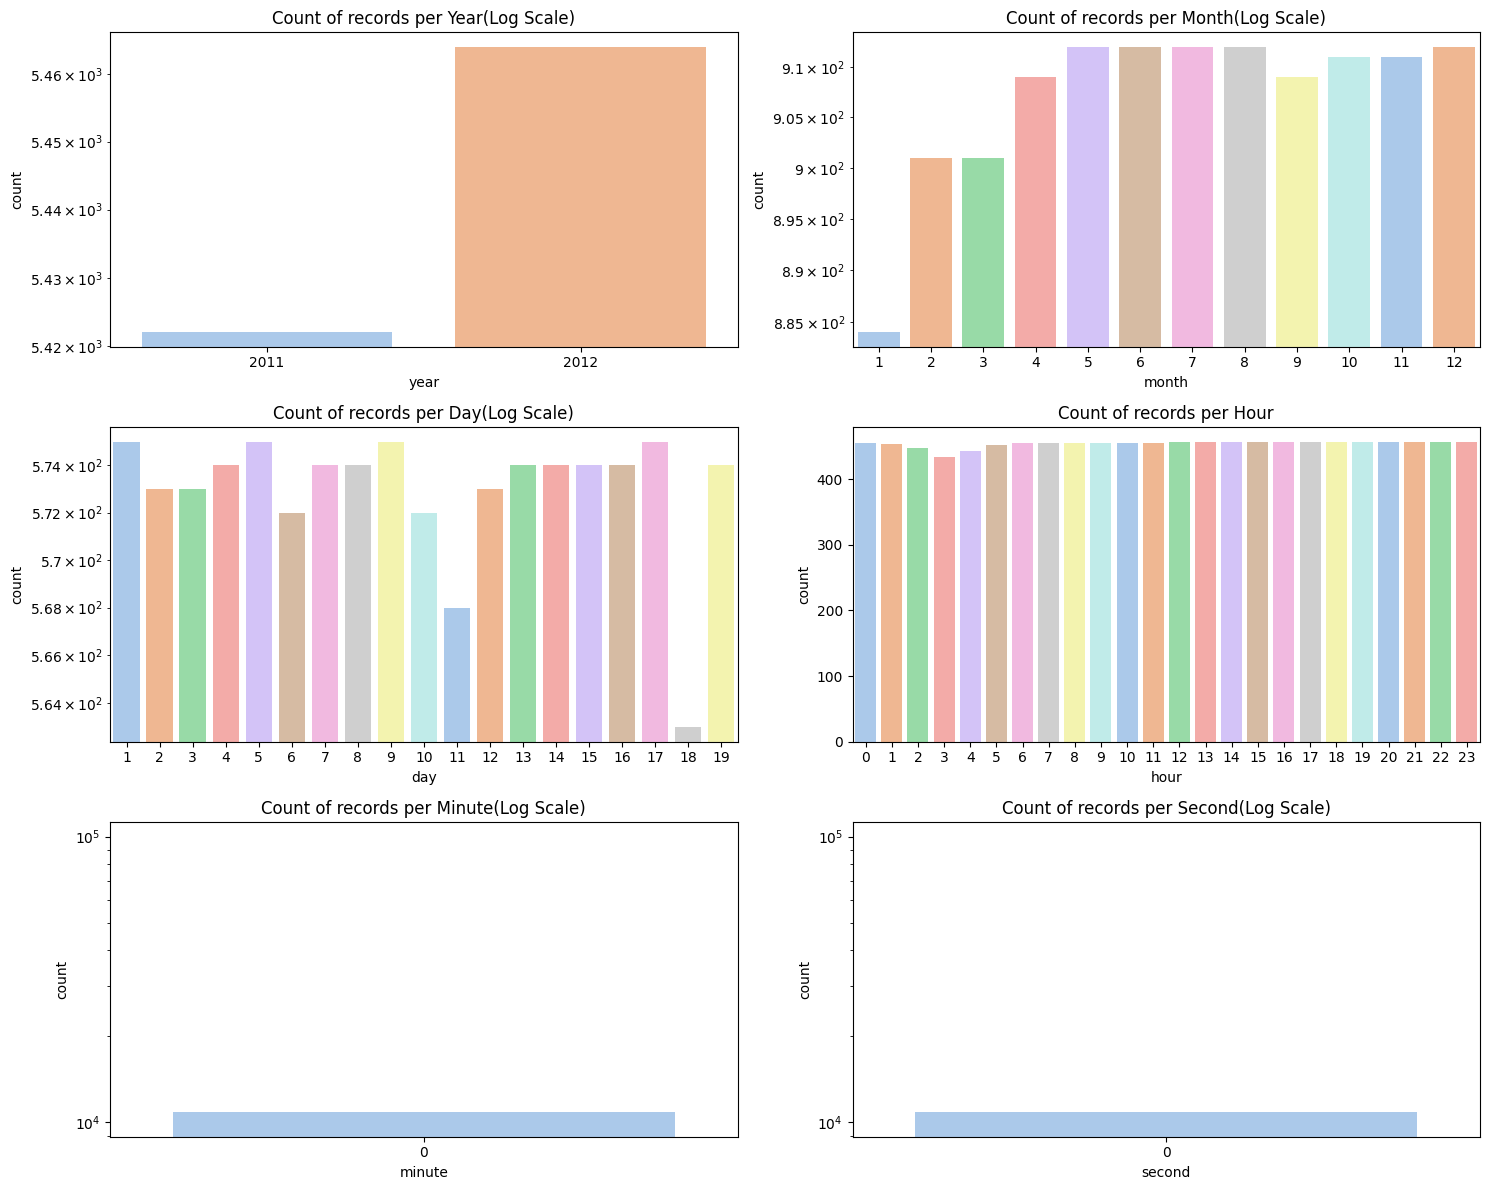

In [77]:
# subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# sns.countplot 활용해서 시각화하기

# 연별
sns.countplot(x='year', data=train, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('Count of records per Year(Log Scale)')

# 월별
sns.countplot(x='month', data=train, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Count of records per Month(Log Scale)')

# 일별
sns.countplot(x='day', data=train, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Count of records per Day(Log Scale)')

# 시간별
sns.countplot(x='hour', data=train, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Count of records per Hour')

# 분별
sns.countplot(x='minute', data=train, ax=axes[2, 0], palette='pastel')
axes[2, 0].set_yscale('log')
axes[2, 0].set_title('Count of records per Minute(Log Scale)')

# 초별
sns.countplot(x='second', data=train, ax=axes[2, 1], palette='pastel')
axes[2, 1].set_yscale('log')
axes[2, 1].set_title('Count of records per Second(Log Scale)')

plt.tight_layout()
plt.show()

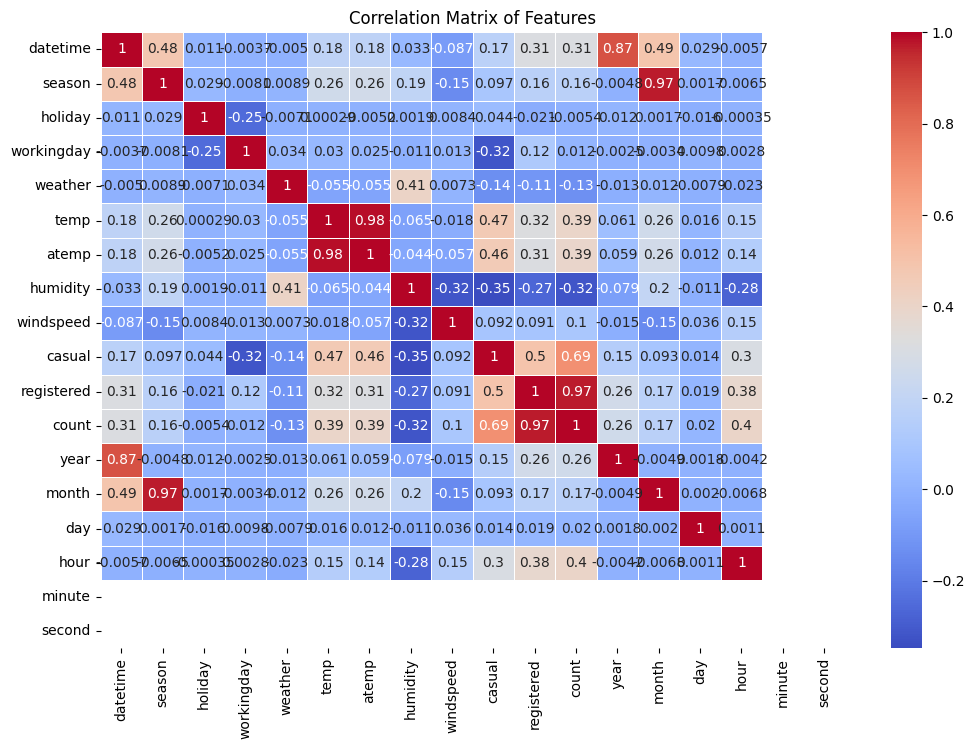

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187,0.866570,0.494087,0.028563,-0.005663,NaN,NaN
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,NaN,NaN
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,NaN,NaN
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,NaN,NaN
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,NaN,NaN
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,NaN,NaN
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,NaN,NaN
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,NaN,NaN
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,NaN,NaN
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,NaN,NaN


In [54]:
# 상관관계 행렬 살펴보기
correlation_matrix = train.corr()

# 상관관계 시각화하기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

correlation_matrix

### **4.`X`, `y` 컬럼 선택 및 `train/test` 데이터 분리**
* X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다. **데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다.** 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.

ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

* `count` 값을 맞추고자 하므로, `y` 변수에 `count` 컬럼의 데이터 넣기

In [55]:
# X 변수에 들어갈 특성 선택하기
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'year', 'day', 'hour']
X = train[features]

# y 변수에 count 특성 넣기
y = train['count']

**특성 제외 이유**

1. atemp의 경우 temp와 0.98의 상관관계가 있음. 이는 실제 온도와 체감 온도가 거의 비슷하다는 것을 알 수 있음.

2. month와 season의 경우 상관관계가 0.97로 나타나, 이는 계절과 월이 거의 비슷하다는 것을 알 수 있음.

3. casual, registered는 count를 예측하는 데 적절한 변수가 아님.

In [56]:
# 범주형 특성 원-핫 인코딩
X = pd.get_dummies(X, columns=['season', 'holiday', 'workingday', 'weather'], drop_first=True)

In [57]:
# temp, humidity, windspeed 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[['temp', 'humidity']] = scaler.fit_transform(X[['temp', 'humidity']])

**범주형 변수를 원-핫 인코딩으로 변환한 이유**
* **숫자형 변수로 변환** : 머신러닝 모델은 수치 데이터를 입력으로 받아들이므로, 필히 범주형 변수를 숫자형으로 변환해야 함. 단순히 범주를 숫자로 매핑하면 모델이 이들 간의 순서를 학습하게 되어 왜곡된 결과를 초래할 수 있음.
* **순서 정보 배제** : 각 범주를 이진 벡터로 변환하여 순서 정보를 배제함.

**연속형 변수의 정규화**
* **스케일 통일** : 모든 변수의 값을 같은 범위(보통 [0, 1] 또는 [-1, 1])로 조정하여 각 변수의 기여도를 균일하게 만듦.
* **모델 성능 향상** : 특히 신경망과 같은 모델은 입력 값의 스케일에 민감하기 때문에 정규화를 통해 모델의 성능을 향상시킬 수 있음.

In [58]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분류하기
# 80% 훈련용, 20% 테스트용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **5. `LinearRegression` 모델 학습**
* `sklearn`의 `LinearRegression` 모델 불러오기 및 학습하기

In [59]:
# sklearn의 LinearRegression 모델 불러오기 및 학습하기
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **6. 학습된 모델로 `X_test`에 대한 예측값 출력 및 손실함수값 계산**
* 학습된 모델에 `X_test`를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 `target` 간의 손실함수 값 계산하기
* `mse` 값과 함께 `rmse` 값도 계산하기

In [65]:
# 학습된 모델에 X_test를 입력해서 예측값 출력하기
y_pred = model.predict(X_test)

# 음수 예측값을 0으로 처리
y_pred = np.maximum(0, y_pred)

print(f"Prediction: {[y_pred]}")

Prediction: [array([240.28896478,  33.88922057, 190.15032768, ..., 308.36219118,
        48.6770029 , 243.72304676])]


In [66]:
# 손실함수 값 계산하기(평가지수 MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 19639.224674612626


In [67]:
# 손실함수 값 계산하기(평가지수 RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 140.14001810550985


### **7. x축은 `temp` 또는 `humidity`로, y축은 `count`로 예측 결과 시각화하기**
* x축에 X 데이터 중 `temp` 데이터를, y축에는 `count` 데이터를 넣어서 시각화하기
* x축에 X 데이터 중 `humidity` 데이터를, y축에는 `count` 데이터를 넣어서 시각화하기

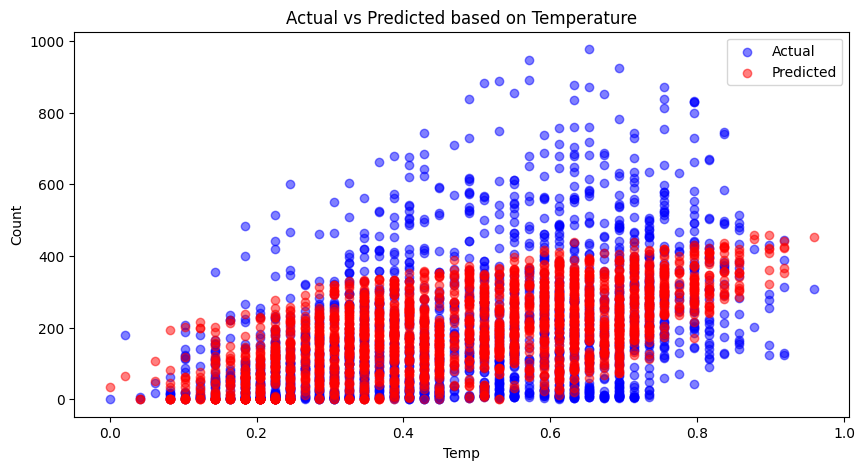

In [68]:
# x축에 X 데이터 중 `temp` 데이터를, y축에는 `count` 데이터를 넣어서 시각화하기
plt.figure(figsize=(10, 5))
plt.scatter(X_test['temp'], y_test, label='Actual', alpha=0.5, color='blue')
plt.scatter(X_test['temp'], y_pred, label='Predicted', alpha=0.5, color='red')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend()
plt.title('Actual vs Predicted based on Temperature')
plt.show()

1. **온도와 대여 수 간의 관계** : 온도가 상승할수록 자전거 대여 수가 증가하는 경향이 있음. 이는 따뜻한 날씨에 사람들이 더 많이 자전거를 이용할 가능성이 있다는 것임.

2. **예측 값과 실제 값의 비교** : 0 ~ 400 사이에 있는 값의 경우 모델이 잘 예측하지만, 그 이상의 값은 잘 예측하지 못한다는 것을 알 수 있음.

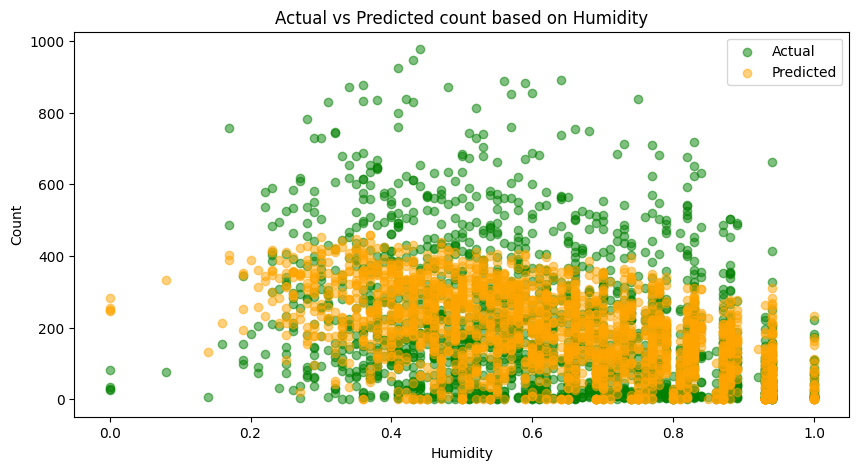

In [69]:
# x축에 X 데이터 중 `humidity` 데이터를, y축에는 `count` 데이터를 넣어서 시각화하기
plt.figure(figsize=(10, 5))
plt.scatter(X_test['humidity'], y_test, label='Actual', alpha=0.5, color='green')
plt.scatter(X_test['humidity'], y_pred, label='Predicted', alpha=0.5, color='orange')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.title('Actual vs Predicted count based on Humidity')
plt.show()

1. **음의 상관관계** : 자전거 대여 수가 습도가 높아질수록 감소하는 패턴이 나타남. 그 이유로는 높은 습도가 자전거 이용을 불편하게 만들기 때문에 발생할 수 있음.

2. **예측 값과 실제 값의 비교** : 0 ~ 400 사이에 있는 값의 경우 모델이 잘 예측하지만, 그 이상의 값은 잘 예측하지 못한다는 것을 알 수 있음.